In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<AxesSubplot:xlabel='Class', ylabel='count'>

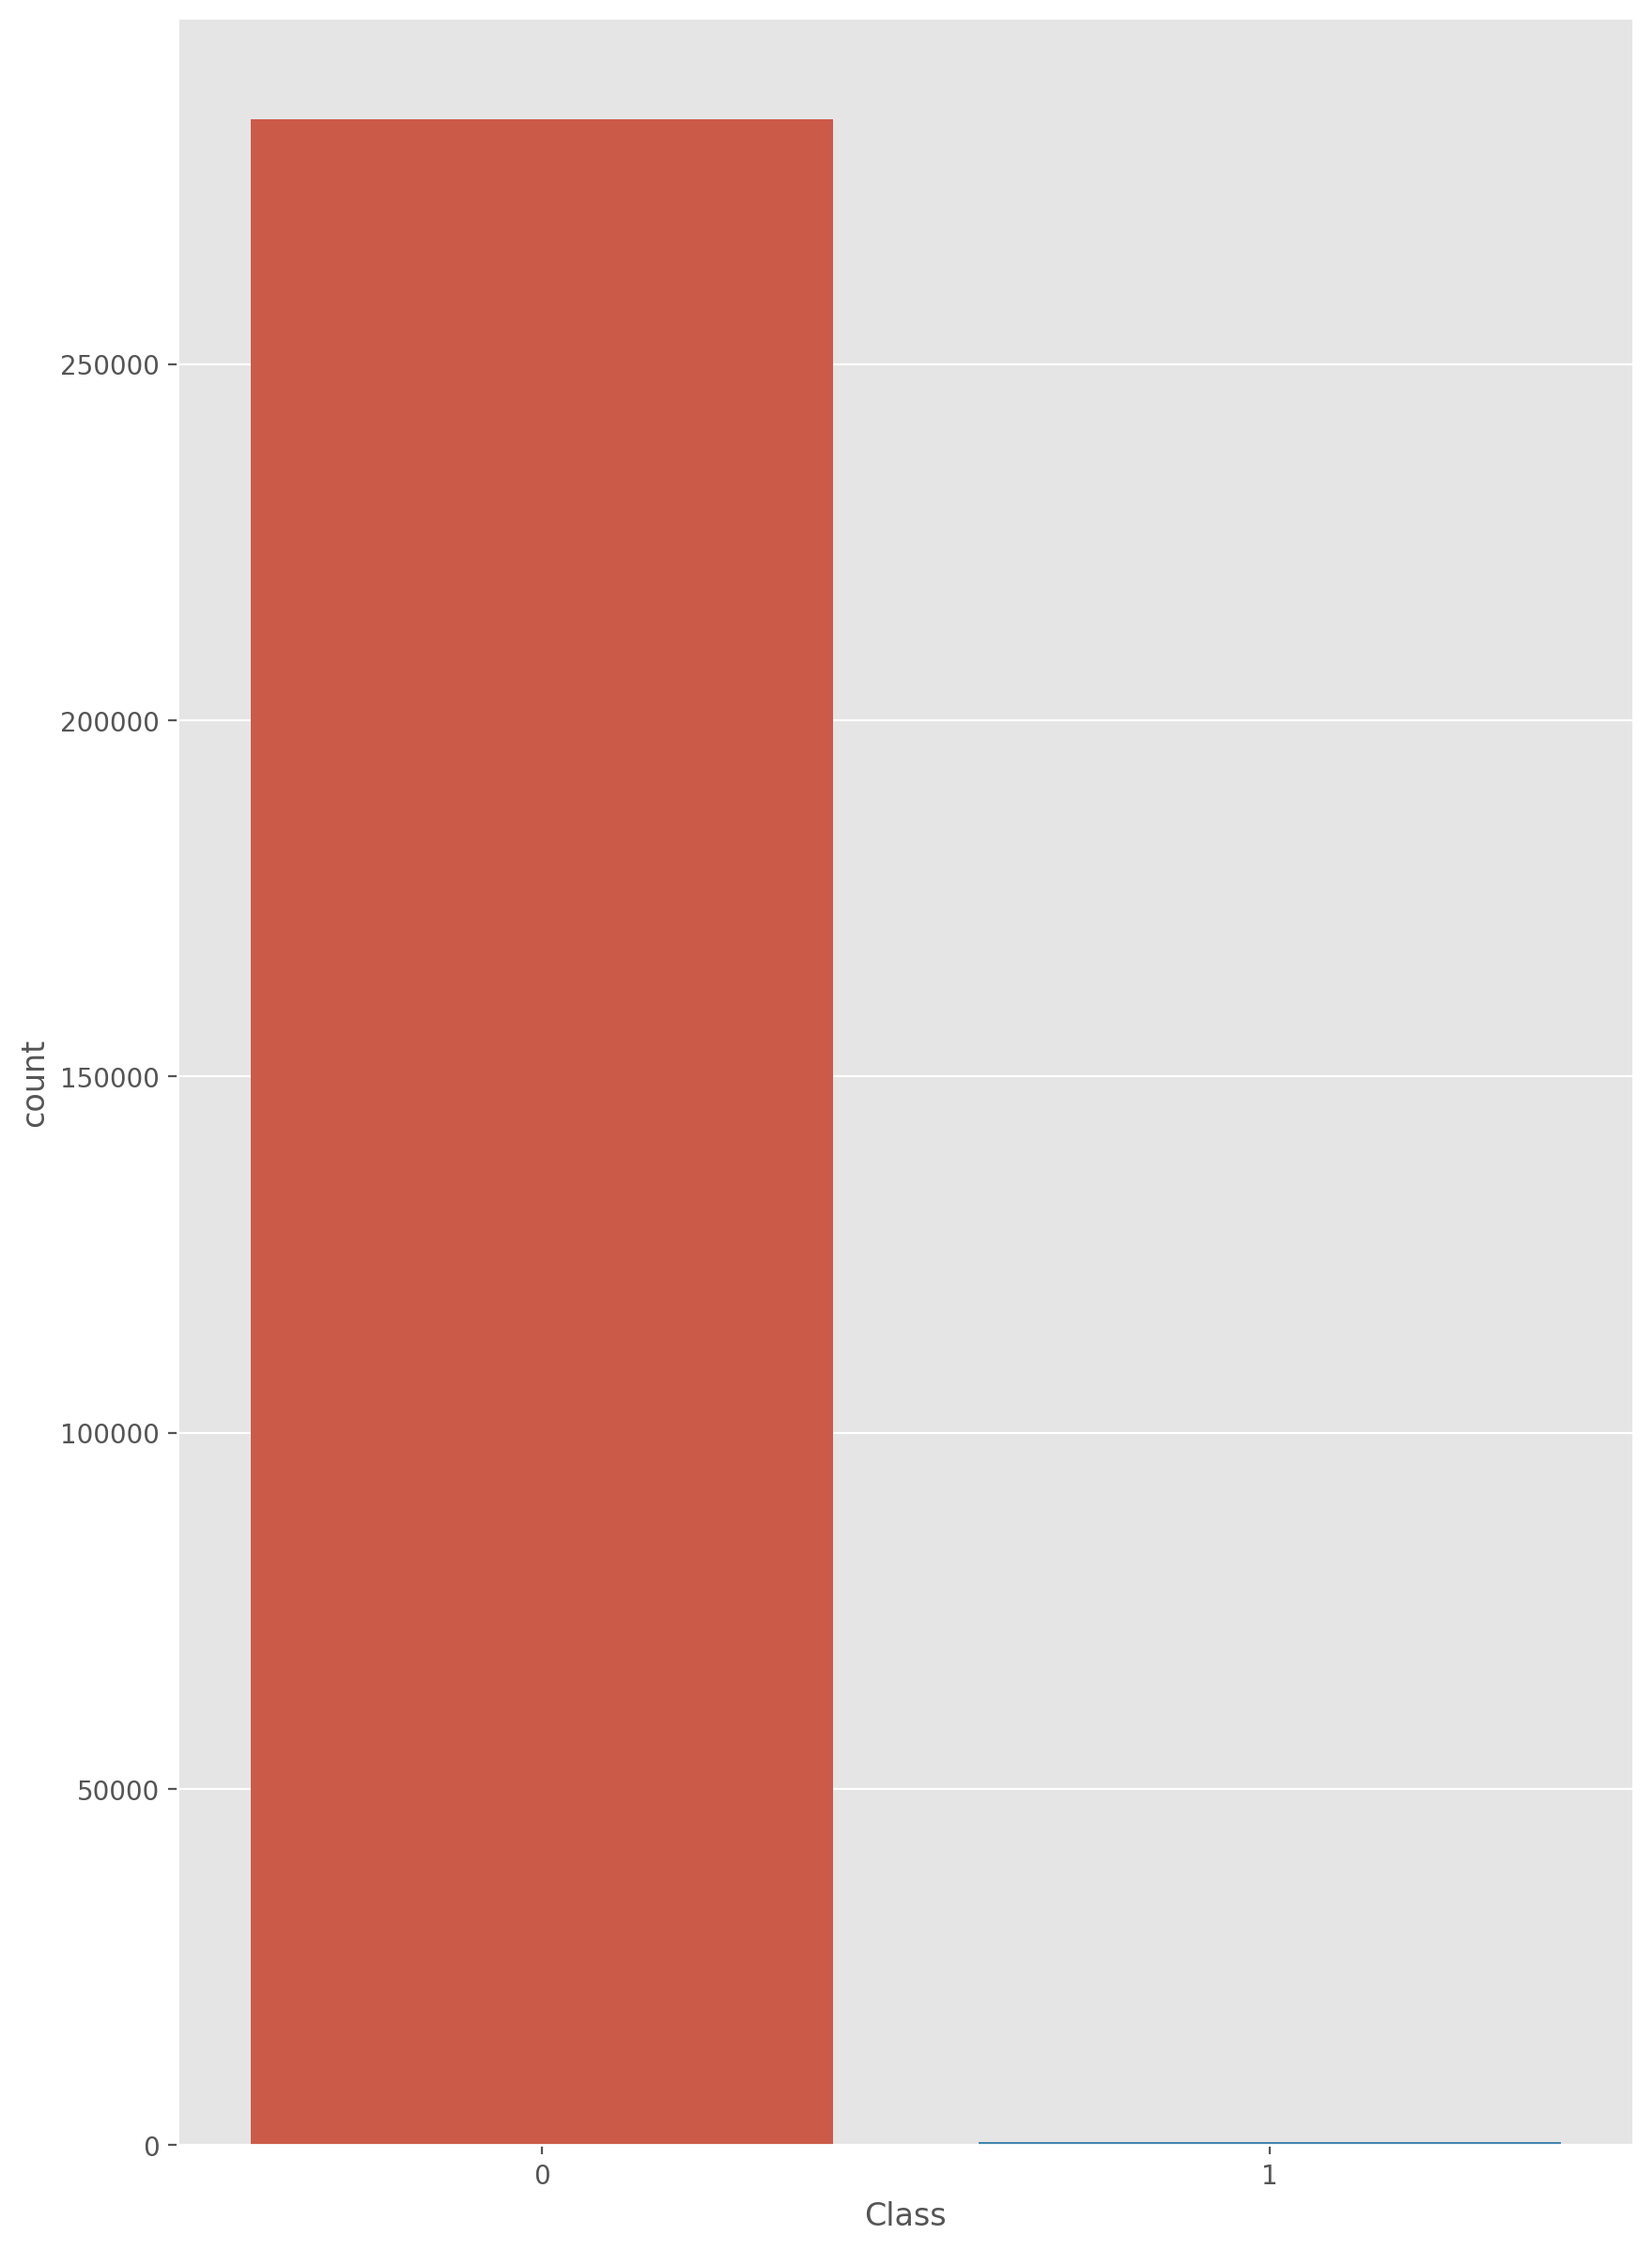

In [4]:
plt.figure(figsize=(10,15),dpi=200)
sns.countplot(df.Class)

In [5]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
class_ratio=df.Class.value_counts(normalize=True)
print("Percentage of Fraufulent Transactions :",class_ratio[1]*100)
print("Percentage of Non Fraufulent Transactions :",class_ratio[0]*100)

Percentage of Fraufulent Transactions : 0.1727485630620034
Percentage of Non Fraufulent Transactions : 99.82725143693798


In [7]:
X=df.drop("Class",axis=1)
Y=df["Class"]

## Without Resampling

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

In [9]:
print("Train data shape :",x_train.shape)
print("Train labels shape :",y_train.shape)
print("Test data shape :",x_test.shape)
print("Test labels shape :",y_test.shape)

Train data shape : (227845, 30)
Train labels shape : (227845,)
Test data shape : (56962, 30)
Test labels shape : (56962,)


In [10]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [11]:
pred_train=classifier.predict(x_train)
pred_test=classifier.predict(x_test)

In [12]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score


In [13]:
print("Training Accuracy :",accuracy_score(y_train,pred_train))
print("Testing Accuracy :",accuracy_score(y_test,pred_test))


Training Accuracy : 0.9989027628431609
Testing Accuracy : 0.9988764439450862


In [14]:
print("Training Set F1_score :",f1_score(y_train,pred_train))
print("Testing Set F1_score :",f1_score(y_test,pred_test))

Training Set F1_score : 0.6819338422391857
Testing Set F1_score : 0.7009345794392523


In [15]:
print("Precision :",precision_score(y_test,pred_test))
print("Recall:",recall_score(y_test,pred_test))

Precision : 0.6818181818181818
Recall: 0.7211538461538461


## With Resampling

In [ ]:
! pip install imbalanced-learn

##### UnderSampling (NearMiss)
- Lets positive samples be the samples belongong to the targeted class to be under-sampled .Negative sample refers to the samples from the minority class(ie. the most under-represented class)
-  NearMiss-1 selects the positive samples for which the average distance the N closest samples of the negative class is the smallest

In [ ]:
from imblearn.under_sampling import NearMiss
nm_sampler=NearMiss()
x_sampled,y_sampled=nm_sampler.fit_resample(X,Y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sampled,y_sampled,test_size=0.2,random_state=5)

print("Train data shape :",x_train.shape)
print("Train labels shape :",y_train.shape)
print("Test data shape :",x_test.shape)
print("Test labels shape :",y_test.shape)

from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

pred_train=classifier.predict(x_train)
pred_test=classifier.predict(x_test)

print("\nTraining Accuracy :",accuracy_score(y_train,pred_train))
print("Testing Accuracy :",accuracy_score(y_test,pred_test))

print("\nTraining Set F1_score :",f1_score(y_train,pred_train))
print("Testing Set F1_score :",f1_score(y_test,pred_test))

print("Precision :",precision_score(y_test,pred_test))
print("Recall:",recall_score(y_test,pred_test))

### Smote Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
smote_sampler=SMOTE()
x_sampled,y_sampled=smote_sampler.fit_resample(X,Y)

print(x_sampled.shape)
print(y_sampled.shape)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_sampled,y_sampled,test_size=0.2,random_state=5)
print("Train data shape :",x_train.shape)
print("Train labels shape :",y_train.shape)
print("Test data shape :",x_test.shape)
print("Test labels shape :",y_test.shape)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sampled,y_sampled,test_size=0.2,random_state=5)

print("Train data shape :",x_train.shape)
print("Train labels shape :",y_train.shape)
print("Test data shape :",x_test.shape)
print("Test labels shape :",y_test.shape)

from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

pred_train=classifier.predict(x_train)
pred_test=classifier.predict(x_test)

print("\nTraining Accuracy :",accuracy_score(y_train,pred_train))
print("Testing Accuracy :",accuracy_score(y_test,pred_test))

print("\nTraining Set F1_score :",f1_score(y_train,pred_train))
print("Testing Set F1_score :",f1_score(y_test,pred_test))

print("Precision :",precision_score(y_test,pred_test))
print("Recall:",recall_score(y_test,pred_test))